# Logistic Regression

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scalar = StandardScaler()

In [51]:
scalar.fit(train_csv)

StandardScaler()

In [52]:
train_data = scalar.transform(train_csv)
test_data = scalar.transform(test_csv)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
lr_clf = LogisticRegression()

In [56]:
lr_clf.fit(train_data, train_labels)

LogisticRegression()

In [57]:
lr_preds = lr_clf.predict(test_data)

In [ ]:
logreg_cv = GridSearchCV(lr_clf,lr_grid,cv=10)
logreg_cv.fit(train_data, train_labels)

In [ ]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
logclf = GridSearchCV(lr_clf, hyperparameters, cv=5, verbose=1)

In [62]:
best_model = logclf.fit(train_data, train_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\vicky\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\vicky\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\vicky\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\vicky\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\users\vicky\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\vicky\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\vicky\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\vicky\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\users\vicky\appdata\local\prog

In [63]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.7825594022071245


In [64]:
best_preds = best_model.predict(test_data)

# KNN Classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [73]:
knn_classifier.fit(train_data, train_labels)

KNeighborsClassifier()

In [74]:
preds = knn_classifier.predict(test_data)

# Decision Trees Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
Dt_classifier = DecisionTreeClassifier()

In [81]:
Dt_classifier.fit(train_data, train_labels)

DecisionTreeClassifier()

In [82]:
decision_preds = Dt_classifier.predict(test_data)

# Artificial Neural Network

In [87]:
import tensorflow as tf

In [88]:
from keras import Sequential
from keras.layers import BatchNormalization, Dropout, Dense

In [89]:
from keras.optimizers import Adam

In [90]:
opt = Adam(learning_rate=0.0001)

In [91]:
model = Sequential()

In [92]:
model.add(Dense(50, activation='relu', input_shape=(11,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_3 (Dense)              (None, 300)               60300     
_________________________________________________________________
dense_4 (Dense)              (None, 500)               150500    
_________________________________________________________________
dense_5 (Dense)              (None, 600)               300600    
_________________________________________________________________
dense_6 (Dense)              (None, 800)               4

In [93]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [94]:
features = train_csv.iloc[:,:]
labels = train_labels

In [95]:
X_train = features
Y_train = np.ravel(train_labels)

In [96]:
X_test = test_data

In [97]:
print(X_train.shape)
print(X_test.shape)

(891, 11)
(418, 11)


In [98]:
from sklearn.preprocessing import MinMaxScaler
std_scalar = MinMaxScaler()

In [99]:
std_scalar.fit(X_train)

MinMaxScaler()

In [100]:
std_scalar.transform(X_train)
std_scalar.transform(X_test)

array([[-8.63113781e-02,  7.37695132e-01, -6.35225126e-04, ...,
         8.50531749e-01, -5.06655284e-01, -2.16802964e-01],
       [-8.63113781e-02, -1.35557354e+00,  1.14523520e-02, ...,
        -1.17573506e+00, -5.06655284e-01, -2.16802964e-01],
       [-6.84682421e-01,  7.37695132e-01,  2.59574445e-02, ...,
         8.50531749e-01, -5.06655284e-01, -2.16802964e-01],
       ...,
       [-8.63113781e-02,  7.37695132e-01,  3.23279954e-03, ...,
         8.50531749e-01, -5.06655284e-01, -2.16802964e-01],
       [-8.63113781e-02,  7.37695132e-01, -4.72315632e-03, ...,
         8.50531749e-01, -5.06655284e-01, -2.16802964e-01],
       [-8.63113781e-02,  7.37695132e-01, -4.72315632e-03, ...,
        -1.17573506e+00, -5.06655284e-01,  4.61248306e+00]])

In [101]:
model.fit(X_train, Y_train, validation_split=0.2, batch_size=64, epochs=200, verbose=1, shuffle=True)

Epoch 1/200
12/12 [==============================] - 0s 38ms/step - loss: 0.6442 - accuracy: 0.6461 - val_loss: 0.5623 - val_accuracy: 0.7207
Epoch 2/200
12/12 [==============================] - 0s 24ms/step - loss: 0.6232 - accuracy: 0.6784 - val_loss: 0.5598 - val_accuracy: 0.7263
Epoch 3/200
12/12 [==============================] - 0s 24ms/step - loss: 0.6186 - accuracy: 0.6798 - val_loss: 0.5460 - val_accuracy: 0.7318
Epoch 4/200
12/12 [==============================] - 0s 23ms/step - loss: 0.6161 - accuracy: 0.6770 - val_loss: 0.5945 - val_accuracy: 0.7151
Epoch 5/200
12/12 [==============================] - 0s 22ms/step - loss: 0.6345 - accuracy: 0.6559 - val_loss: 0.5860 - val_accuracy: 0.6927
Epoch 6/200
12/12 [==============================] - 0s 22ms/step - loss: 0.6286 - accuracy: 0.6826 - val_loss: 0.5544 - val_accuracy: 0.7430
Epoch 7/200
12/12 [==============================] - 0s 22ms/step - loss: 0.6075 - accuracy: 0.6699 - val_loss: 0.5511 - val_accuracy: 0.7207
Epoch 

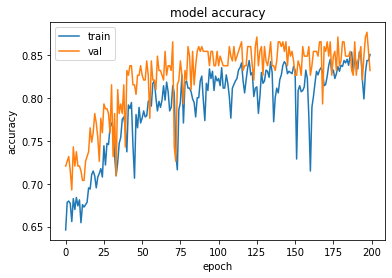

In [102]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

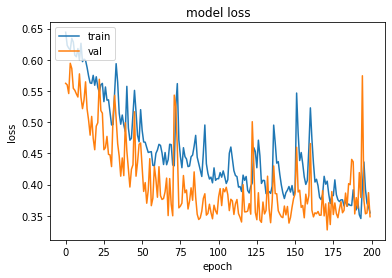

In [103]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [104]:
ann_preds = model.predict(X_test)

In [105]:
ann_preds = np.argmax(ann_preds, axis=-1)
# ann_preds = np.where(ann_preds>=0.5, 1, 0)

# SVM Classifier

In [116]:
from sklearn.svm import SVC

In [117]:
SVC_classifier = SVC(C=10.0, gamma=0.05)

In [118]:
SVC_classifier.fit(train_data, train_labels)

SVC(C=10.0, gamma=0.05)

In [119]:
svc_preds = SVC_classifier.predict(test_data)

# Random Forest Classifier

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
Rf_classifier = RandomForestClassifier(max_depth=10)

In [128]:
Rf_classifier.fit(train_data, train_labels)

RandomForestClassifier(max_depth=10)

In [129]:
Rf_preds = Rf_classifier.predict(test_data)

In [131]:
param_grid = { 
    'n_estimators': [100, 200, 500, 1000, 1500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, 10, 15, 20],
    'criterion' :['gini', 'entropy']
}

In [132]:
rf_grid_clf = GridSearchCV(estimator=Rf_classifier, param_grid=param_grid, cv=5)

In [133]:
rf_grid_clf.fit(train_data, train_labels)

In [134]:
# print("Best score: %0.3f" % rf_grid_clf.best_score_)
print(rf_grid_clf.best_estimator_)

# Adaboost Classifier

In [135]:
from sklearn.ensemble import AdaBoostClassifier

In [136]:
abc = AdaBoostClassifier()

In [137]:
abc.fit(train_data, train_labels)

AdaBoostClassifier()

In [138]:
abc.predict(test_data)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [139]:
abc_grid={'n_estimators':[250,500,1000,2000],'learning_rate':[.0001,.001,0.01,.1]}

In [140]:
from sklearn.model_selection import KFold

In [141]:
cross_val = KFold(n_splits=10,shuffle=True,random_state=1)
abc_grid_clf = GridSearchCV(estimator=abc, param_grid=abc_grid, scoring='accuracy', n_jobs=1, cv=cross_val)

In [142]:
abc_grid_clf.fit(train_data, train_labels)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'n_estimators': [250, 500, 1000, 2000]},
             scoring='accuracy')

In [143]:
print("Best score: %0.3f" % abc_grid_clf.best_score_)
print(abc_grid_clf.best_estimator_)

Best score: 0.822
AdaBoostClassifier(learning_rate=0.01, n_estimators=2000)


# XGBoost Classifier

In [146]:
import xgboost as xgb

In [147]:
from sklearn.model_selection import StratifiedKFold

In [148]:
data_dmat = xgb.DMatrix(data=train_data, label=train_labels)

In [149]:
xgb_clf = xgb.XGBClassifier()

In [150]:
xgb_clf.fit(train_data, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [151]:
xgb_clf.predict(test_data)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [152]:
xgbparameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05, 0.001, 0.1, 0.01], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5, 50, 100, 500, 1000], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

In [153]:
xgb_grid = GridSearchCV(xgb_clf, xgbparameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

In [154]:
xgb_grid.fit(train_data, train_labels)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    7.5s finished


[18:37:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monoton...
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.05, 0.001, 0.1, 0.01],
                         'max_depth': [6],

In [155]:
print("Best score: %0.3f" % xgb_grid.best_score_)
print(xgb_grid.best_estimator_)

Best score: 0.877
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, nthread=4, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, silent=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [156]:
xgb_new = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, nthread=4, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, silent=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [157]:
xgb_new.fit(train_data, train_labels)

[18:37:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, nthread=4, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, silent=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [158]:
xgb_preds = xgb_new.predict(test_data)